In [1]:
import pandas as pd
df_cust = pd.read_csv('BGCON_CUST_DATA.csv', encoding = 'utf-8', dtype={'RESI_TYPE_CODE':str})
df_cntt = pd.read_csv('BGCON_CNTT_DATA.csv', encoding = 'utf-8')
df_claim = pd.read_csv('BGCON_CLAIM_DATA.csv', encoding = 'utf-8', dtype={'HOSP_SPEC_DVSN':str})
df_fpinfo = pd.read_csv('BGCON_FPINFO_DATA.csv', encoding = 'utf-8')

# 고객 테이블

In [2]:
df_cust.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,...,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,47,21111,20,N,199910.0,충북,...,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,53,40000,20,N,199910.0,서울,...,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,60,0,NaN,N,199910.0,서울,...,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,64,12861,40,Y,199910.0,경기,...,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,54,0,NaN,Y,199910.0,광주,...,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0


In [3]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22400 entries, 0 to 22399
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CUST_ID           22400 non-null  int64  
 1   DIVIDED_SET       22400 non-null  int64  
 2   SIU_CUST_YN       20607 non-null  object 
 3   SEX               22400 non-null  int64  
 4   AGE               22400 non-null  int64  
 5   RESI_COST         22400 non-null  int64  
 6   RESI_TYPE_CODE    21146 non-null  object 
 7   FP_CAREER         22400 non-null  object 
 8   CUST_RGST         21944 non-null  float64
 9   CTPR              21779 non-null  object 
 10  OCCP_GRP_1        21805 non-null  object 
 11  OCCP_GRP_2        21805 non-null  object 
 12  TOTALPREM         16609 non-null  float64
 13  MINCRDT           12924 non-null  float64
 14  MAXCRDT           12924 non-null  float64
 15  WEDD_YN           21927 non-null  object 
 16  MATE_OCCP_GRP_1   10573 non-null  object

<AxesSubplot:>

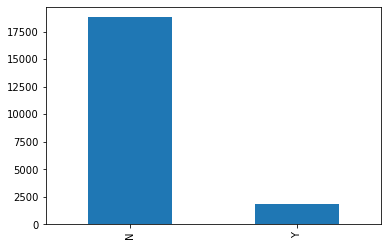

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df_cust['SIU_CUST_YN'].value_counts().plot(ax=ax, kind='bar')
#사기여부. 사기가 아닌 경우가 많음. 불균형 데이터.

<AxesSubplot:>

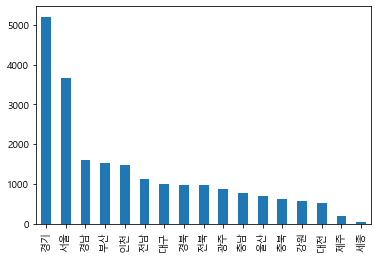

In [5]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
fig, ax = plt.subplots()
df_cust['CTPR'].value_counts().plot(ax=ax, kind='bar')

In [6]:
df_cust.describe()

,CUST_ID,DIVIDED_SET,SEX,AGE,RESI_COST,CUST_RGST,TOTALPREM,MINCRDT,MAXCRDT,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
count,22400.000000,22400.000000,22400.000000,22400.000000,22400.000000,21944.000000,1.660900e+04,12924.000000,12924.000000,21927.000000,21927.000000,15914.000000,1.591400e+04,17137.000000,22400.000000,21720.000000
mean,11200.500000,1.080045,1.565134,44.734866,15914.413973,198924.250638,2.998266e+07,5.838904,19.480656,0.709491,8.603731,200881.825437,4.807763e+05,2704.184863,4768.733884,5198.238950
std,6466.467351,0.271368,0.495750,15.445707,14963.317519,16989.329112,4.897438e+07,3.515198,32.363151,0.953671,11.585592,522.266749,1.327265e+06,2188.208641,3072.385280,2714.947843
min,1.000000,1.000000,1.000000,2.000000,0.000000,101.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,5600.750000,1.000000,1.000000,34.000000,6732.750000,200306.000000,6.665459e+06,6.000000,6.000000,0.000000,0.000000,200404.000000,1.129440e+05,0.000000,2995.000000,3557.750000
50%,11200.500000,1.000000,2.000000,46.000000,12222.000000,200306.000000,1.622463e+07,6.000000,6.000000,0.000000,0.000000,200901.000000,2.265920e+05,3432.000000,4807.000000,4681.000000
75%,16800.250000,1.000000,2.000000,56.000000,20988.000000,200402.000000,3.479439e+07,6.000000,7.000000,1.000000,19.000000,201402.000000,4.852868e+05,4398.000000,6607.250000,6839.500000
max,22400.000000,2.000000,2.000000,89.000000,305555.000000,201602.000000,1.840052e+09,99.000000,99.000000,6.000000,35.000000,207110.000000,5.686262e+07,12687.000000,19829.000000,25872.000000


In [7]:
df_cust.isnull().sum()

CUST_ID                 0
DIVIDED_SET             0
SIU_CUST_YN          1793
SEX                     0
AGE                     0
RESI_COST               0
RESI_TYPE_CODE       1254
FP_CAREER               0
CUST_RGST             456
CTPR                  621
OCCP_GRP_1            595
OCCP_GRP_2            595
TOTALPREM            5791
MINCRDT              9476
MAXCRDT              9476
WEDD_YN               473
MATE_OCCP_GRP_1     11827
MATE_OCCP_GRP_2     11827
CHLD_CNT              473
LTBN_CHLD_AGE         473
MAX_PAYM_YM          6486
MAX_PRM              6486
CUST_INCM            5263
RCBASE_HSHD_INCM        0
JPBASE_HSHD_INCM      680
dtype: int64

C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


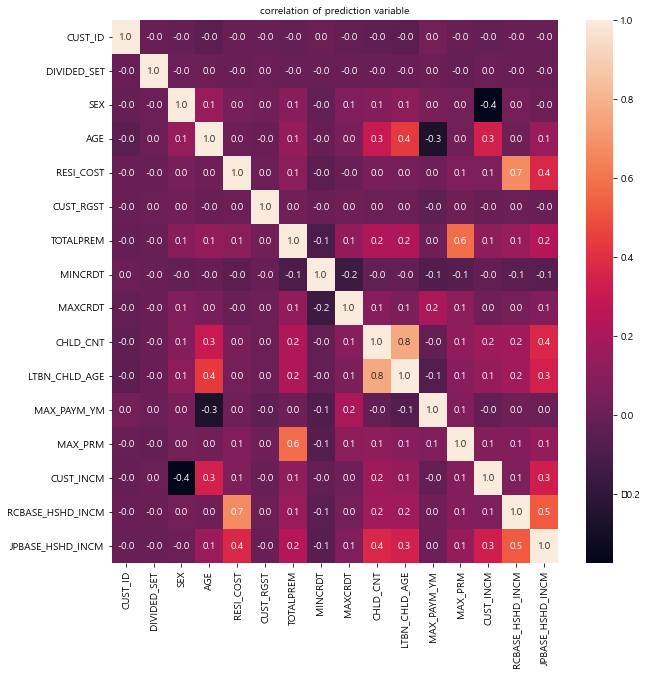

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df_cust.corr(), annot=True, fmt='.1f')
plt.title('correlation of prediction variable', fontsize=10)
plt.show()

In [9]:
# 데이터 정리(결측치가 많고, 의미 약한 변수를 정리하자)
df_cust = df_cust.drop(['DIVIDED_SET', 'RESI_TYPE_CODE', 'CUST_RGST', 'OCCP_GRP_2', 'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE', 'MAX_PAYM_YM', 'JPBASE_HSHD_INCM'], axis=1)

In [10]:
df_cust.isnull().sum()

CUST_ID                0
SIU_CUST_YN         1793
SEX                    0
AGE                    0
RESI_COST              0
FP_CAREER              0
CTPR                 621
OCCP_GRP_1           595
TOTALPREM           5791
MINCRDT             9476
MAXCRDT             9476
WEDD_YN              473
MAX_PRM             6486
CUST_INCM           5263
RCBASE_HSHD_INCM       0
dtype: int64

In [11]:
# 범주형 변수에서 결측을 하나의 범주로 인정한다.
df_cust.fillna({'CTPR':'None'}, inplace=True)
df_cust.fillna({'OCCP_GRP_1':'None'}, inplace=True)
df_cust.fillna({'WEDD_YN':'None'}, inplace=True)

df_cust = df_cust[df_cust['SIU_CUST_YN'].notna()] # SIU_CUST_YN 이 없는 레코드 제외

In [12]:
df_cust.isnull().sum() # 결측치 비율

CUST_ID                0
SIU_CUST_YN            0
SEX                    0
AGE                    0
RESI_COST              0
FP_CAREER              0
CTPR                   0
OCCP_GRP_1             0
TOTALPREM           5321
MINCRDT             8766
MAXCRDT             8766
WEDD_YN                0
MAX_PRM             5966
CUST_INCM           4823
RCBASE_HSHD_INCM       0
dtype: int64

# 보험계약 데이터

In [13]:
df_cntt

,POLY_NO,CUST_ID,CUST_ROLE,IRKD_CODE_DTAL,IRKD_CODE_ITEM,GOOD_CLSF_CDNM,CNTT_YM,CLLT_FP_PRNO,REAL_PAYM_TERM,SALE_CHNL_CODE,...,EXPR_YM,EXTN_YM,LAPS_YM,PAYM_CYCL_CODE,MAIN_INSR_AMT,SUM_ORIG_PREM,RECP_PUBL,CNTT_RECP,MNTH_INCM_AMT,DISTANCE
0,1,2805,1,1550,10,일반종신,200306,4671.0,20,1,...,999912.0,NaN,NaN,1.0,50000000.0,187150.0,0.0,0.0,0.0,15.0
1,2,5658,1,1550,10,일반종신,200306,5900.0,15,1,...,999912.0,200809.0,NaN,1.0,50000000.0,118750.0,0.0,0.0,200000.0,147.0
2,3,4583,1,1257,21,일반연금,200307,5778.0,5,1,...,999912.0,200605.0,200605.0,1.0,42000000.0,700700.0,22.0,0.0,300000.0,3.0
3,4,14363,1,1550,10,일반종신,200306,4553.0,15,1,...,999912.0,201104.0,NaN,1.0,50000000.0,102450.0,0.0,0.0,250000.0,13.0
4,5,1222,0,1268,18,어린이,200306,3366.0,10,1,...,202706.0,NaN,NaN,1.0,30000000.0,33750.0,3.0,0.0,150000.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113005,112765,12297,1,1267,1,보장,200204,4033.0,10,2,...,201204.0,200205.0,NaN,1.0,10000000.0,33600.0,0.0,0.0,0.0,3.0
113006,112766,9296,1,1256,27,일반종신,200204,4023.0,20,2,...,999912.0,200602.0,200602.0,1.0,50000000.0,154250.0,0.0,0.0,0.0,8.0
113007,112767,20517,1,1267,1,보장,200204,4033.0,10,2,...,202204.0,NaN,NaN,1.0,10000000.0,90100.0,0.0,0.0,0.0,7.0
113008,112768,1316,1,1228,13,일반연금,200204,2309.0,10,2,...,999912.0,200812.0,200508.0,1.0,2461560.0,20513.0,0.0,0.0,0.0,NaN


In [14]:
df_cntt = df_cntt.drop(['IRKD_CODE_DTAL','IRKD_CODE_ITEM','CNTT_YM','EXPR_YM','EXTN_YM','LAPS_YM','SUM_ORIG_PREM','RECP_PUBL','CNTT_RECP','MNTH_INCM_AMT'], axis=1)
df_cntt.isnull().sum() # 결측치 비율

POLY_NO               0
CUST_ID               0
CUST_ROLE             0
GOOD_CLSF_CDNM        0
CLLT_FP_PRNO         82
REAL_PAYM_TERM        0
SALE_CHNL_CODE        0
CNTT_STAT_CODE       82
PAYM_CYCL_CODE       82
MAIN_INSR_AMT        82
DISTANCE          10556
dtype: int64

In [15]:
df_claim.isnull().sum() # 보험료 청구데이터 결측치 비율

CUST_ID                 0
POLY_NO                 0
ACCI_OCCP_GRP1       1417
ACCI_OCCP_GRP2       1417
CHANG_FP_YN             0
CNTT_RECP_SQNO          0
RECP_DATE               0
ORIG_RESN_DATE          0
RESN_DATE               0
CRNT_PROG_DVSN          0
ACCI_DVSN               0
CAUS_CODE               0
CAUS_CODE_DTAL          0
DSAS_NAME               0
DMND_RESN_CODE          0
DMND_RSCD_SQNO          0
HOSP_OTPA_STDT      32571
HOSP_OTPA_ENDT      32571
RESL_CD1                0
RESL_NM1                0
VLID_HOSP_OTDA          0
HOUSE_HOSP_DIST     17048
HOSP_CODE               9
ACCI_HOSP_ADDR      10070
HOSP_SPEC_DVSN          9
CHME_LICE_NO            0
PAYM_DATE              13
DMND_AMT                0
PAYM_AMT                0
PMMI_DLNG_YN            0
SELF_CHAM          100053
NON_PAY            100053
TAMT_SFCA          100053
PATT_CHRG_TOTA     100053
DSCT_AMT           100053
COUNT_TRMT_ITEM    100053
DCAF_CMPS_XCPA     110963
NON_PAY_RATIO           0
HEED_HOSP_YN

In [16]:
df_claim = df_claim.drop(['ACCI_OCCP_GRP1','ACCI_OCCP_GRP2','CHANG_FP_YN','CNTT_RECP_SQNO','RECP_DATE','ORIG_RESN_DATE','RESN_DATE','CRNT_PROG_DVSN',
                          'SELF_CHAM','NON_PAY','TAMT_SFCA','PATT_CHRG_TOTA','DSCT_AMT','COUNT_TRMT_ITEM','DCAF_CMPS_XCPA','HOUSE_HOSP_DIST',
                          'DMND_RSCD_SQNO','HOSP_OTPA_STDT','HOSP_OTPA_ENDT','ACCI_HOSP_ADDR','PAYM_DATE'], axis=1)
df_claim.isnull().sum() # 결측치 비율

CUST_ID           0
POLY_NO           0
ACCI_DVSN         0
CAUS_CODE         0
CAUS_CODE_DTAL    0
DSAS_NAME         0
DMND_RESN_CODE    0
RESL_CD1          0
RESL_NM1          0
VLID_HOSP_OTDA    0
HOSP_CODE         9
HOSP_SPEC_DVSN    9
CHME_LICE_NO      0
DMND_AMT          0
PAYM_AMT          0
PMMI_DLNG_YN      0
NON_PAY_RATIO     0
HEED_HOSP_YN      0
dtype: int64

In [17]:
!pip install pandasql
import numpy as np 
from pandasql import sqldf
dfsql = lambda q: sqldf(q, globals())

In [18]:
# EDA
df_cust['SIU_CUST_YN'].value_counts() # class Imblance 확인(90:10)

N    18801
Y     1806
Name: SIU_CUST_YN, dtype: int64

In [19]:
dfsql('''select FP_CAREER, SIU_CUST_YN, count(*) as cnt from df_cust group by FP_CAREER, SIU_CUST_YN''')

,FP_CAREER,SIU_CUST_YN,cnt
0,N,N,17858
1,N,Y,1630
2,Y,N,943
3,Y,Y,176


In [20]:
dfsql('''select SEX, SIU_CUST_YN, count(*) as cnt from df_cust 
         group by SEX, SIU_CUST_YN''')

,SEX,SIU_CUST_YN,cnt
0,1,N,8310
1,1,Y,651
2,2,N,10491
3,2,Y,1155


In [21]:
dfsql('''select CTPR, SIU_CUST_YN, count(*) as cnt from df_cust 
         group by CTPR, SIU_CUST_YN''')

,CTPR,SIU_CUST_YN,cnt
0,None,N,547
1,None,Y,28
2,강원,N,450
3,강원,Y,74
4,경기,N,4469
5,경기,Y,349
6,경남,N,1368
7,경남,Y,94
8,경북,N,851
9,경북,Y,45


In [22]:
dfsql(''' select SIU_CUST_YN, avg(age) from df_cust group by SIU_CUST_YN ''')

,SIU_CUST_YN,avg(age)
0,N,44.463646
1,Y,47.295681


In [23]:
dfsql(''' select SIU_CUST_YN, avg(MINCRDT) from df_cust group by SIU_CUST_YN ''')

,SIU_CUST_YN,avg(MINCRDT)
0,N,5.811037
1,Y,6.303158


In [24]:
# 고객 단위로 cntt 데이터 만들기(고객 한명이 여러 증권을 가지고 있으므로 고객단위로 합친다)
cust_cntt = dfsql('''select cust_id, count(poly_no) as n_insu, avg(REAL_PAYM_TERM) as pay_term, avg(PAYM_CYCL_CODE) as pay_cycle, avg(MAIN_INSR_AMT)/1000 as insu_amt from df_cntt group by cust_id''') 
cust_cntt

,CUST_ID,n_insu,pay_term,pay_cycle,insu_amt
0,1,34,3.147059,8.705882,19202.405676
1,2,38,4.657895,8.131579,20005.105263
2,3,2,10.000000,1.000000,10000.000000
3,4,108,8.657407,1.129630,15616.540694
4,5,5,12.200000,0.800000,29600.000000
...,...,...,...,...,...
22395,22396,2,20.000000,1.000000,52500.000000
22396,22397,1,15.000000,1.000000,20000.000000
22397,22398,3,1.000000,4.666667,100.000000
22398,22399,4,16.750000,1.000000,89913.493250
